# 1.7.01 Camera Calibration

<h3>
    <ul>
        <li>We will learn about distorions in camera, intrinsic and extinsic parametters of camera etc.</li>
        <li>We will learn to find these parameters, undistort images etc.</li>
    </ul>
</h3>

In [29]:
import numpy as np
import cv2
import glob

# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# prepare object points, like (0,0,0), (1,0,0), (2,0,0), ..., (6,5,0)
objp = np.zeros((6*7, 3), np.float32)
objp[:, :2] = np.mgrid[0:7, 0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d point in image space

images = glob.glob('./board2/*.png')

print(len(images))

for fname in images :
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (7, 6), None)
    
    if ret == True :
        objpoints.append(objp)
        
        corners2 = cv2.cornerSubPix(gray, corners, (11, 11), (-1,-1), criteria)
        imgpoints.append(corners2)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (7, 6), corners2, ret)
        cv2.imshow('img', img)
        ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
        #print (mtx)
        #print (dist)
        #print (rvecs)
        cv2.waitKey(500)
    
cv2.destroyAllWindows()

5


### Using cv2.undistort()

(<matplotlib.axes._subplots.AxesSubplot at 0x1ddf3478ac0>,
 <matplotlib.image.AxesImage at 0x1ddf2f7deb0>)

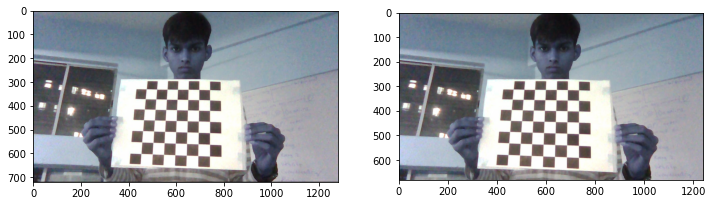

In [20]:
import numpy as np
import cv2
import glob
from matplotlib import pyplot as plt

img - cv2.imread('./board2/image50.png')
h, w = img.shape[:2]
newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w, h), 1, (w, h))

# undistost
dst = cv2.undistort(img, mtx, dist, None, newcameramtx)

# crop the image
x, y, w, h = roi
dst = dst[y:y+h, x:x+w]


plt.figure(figsize=(12, 8))
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(dst)


### Using remapping

(<matplotlib.axes._subplots.AxesSubplot at 0x1dd87218a90>,
 <matplotlib.image.AxesImage at 0x1dd880f2fd0>)

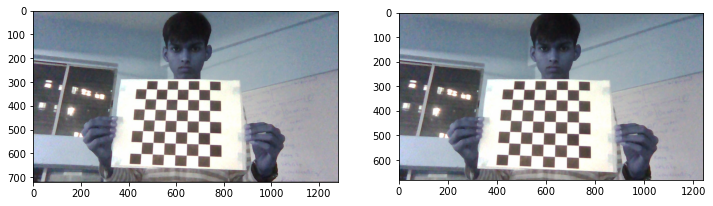

In [21]:
import numpy as np
import cv2
import glob
from matplotlib import pyplot as plt

img - cv2.imread('./board2/image50.png')
h, w = img.shape[:2]
newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w, h), 1, (w, h))

# undistost
mapx, mapy = cv2.initUndistortRectifyMap(mtx, dist, None, newcameramtx, (w, h), 5)
dst = cv2.remap(img, mapx, mapy, cv2.INTER_LINEAR)

# crop the image
x, y, w, h = roi
dst = dst[y:y+h, x:x+w]


plt.figure(figsize=(12, 8))
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(dst)


### Re-projection Error

In [22]:
tot_error = 0
for i in range(len(objpoints)):
    imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
    error = cv2.norm(imgpoints[i],imgpoints2, cv2.NORM_L2)/len(imgpoints2)
    tot_error += error
print("mean error: ", tot_error/len(objpoints))

mean error:  0.09615321942126027
